In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
upernavik gl
tuktoyaktuk ca
jamestown sh
luderitz na
nouakchott mr
bengkulu id
bijie cn
pochutla mx
kirakira sb
goderich sl
cape town za
port alfred za
yar-sale ru
tuktoyaktuk ca
port alfred za
mataura pf
ostrovnoy ru
la ligua cl
ushuaia ar
tarsus tr
neyshabur ir
kimi gr
barrow us
kapaa us
sao jose da coroa grande br
saleaula ws
sao filipe cv
melito di porto salvo it
saskylakh ru
karaul ru
bredasdorp za
gbarnga lr
ushuaia ar
katherine au
gigmoto ph
mount gambier au
vaini to
husavik is
eau claire us
hermanus za
port lincoln au
shelburne ca
tsihombe mg
chokurdakh ru
bluff nz
khatanga ru
bluff nz
norman wells ca
punta arenas cl
saskylakh ru
sidi ali dz
qingyuan cn
saleaula ws
rikitea pf
chokurdakh ru
farafangana mg
malanje ao
norman wells ca
punta arenas cl
hermanus za
sola vu
saint-augustin ca
yerofey pavlovich ru
qaanaaq gl
victor harbor au
tuggurt dz
norman wells ca
meulaboh id
punta arenas cl
vaini to
saskylakh ru
hit iq
weligama lk
chokurdakh ru
ushuaia ar
barrow us
cabo s

hobart au
ambato ec
faanui pf
upernavik gl
wanning cn
siavonga zm
rikitea pf
qaanaaq gl
dukstas lt
asfi ma
mahebourg mu
kupang id
hilo us
jamestown sh
qaanaaq gl
nizhneyansk ru
rafraf tn
hithadhoo mv
port elizabeth za
ribeira grande pt
kapaa us
kapaa us
washington us
birao cf
barrow us
tasiilaq gl
kuche cn
lakes entrance au
atuona pf
port elizabeth za
narsaq gl
vaini to
rikitea pf
saint-philippe re
dali cn
port blair in
hobart au
ushuaia ar
ushuaia ar
bluff nz
mataura pf
kapaa us
longyearbyen sj
bengkulu id
belvedere marittimo it
qaanaaq gl
shingu jp
kaeo nz
ixtapa mx
tiksi ru
new norfolk au
port hardy ca
rawson ar
matagami ca
rikitea pf
samusu ws
tema gh
puerto ayora ec
ossora ru
punta arenas cl
east london za
abu zabad sd
atuona pf
pevek ru
castro cl
grand gaube mu
tessalit ml
itainopolis br
ushuaia ar
taolanaro mg
mys shmidta ru
rio grande br
saldanha za
samusu ws
kaitangata nz
sargur in
aketi cd
bayog ph
rikitea pf
georgetown sh
aquiraz br
rikitea pf
limon cr
bluff nz
puerto ayora 

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [23]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | nouakchott
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | bijie
Processing Record 9 of Set 1 | pochutla
Processing Record 10 of Set 1 | kirakira
Processing Record 11 of Set 1 | goderich
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | yar-sale
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | la ligua
Processing Record 18 of Set 1 | tarsus
Processing Record 19 of Set 1 | neyshabur
Processing Record 20 of Set 1 | kimi
City not found. Skipping...
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | sao jose da coroa grande
Processing Record 24 of S

Processing Record 35 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 4 | san jose
Processing Record 38 of Set 4 | stabat
Processing Record 39 of Set 4 | puerto ayora
Processing Record 40 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 41 of Set 4 | gravdal
Processing Record 42 of Set 4 | aykhal
Processing Record 43 of Set 4 | yerbogachen
Processing Record 44 of Set 4 | castro
Processing Record 45 of Set 4 | alta floresta
Processing Record 46 of Set 4 | aranyosapati
Processing Record 47 of Set 4 | floro
Processing Record 48 of Set 4 | joshimath
Processing Record 49 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 50 of Set 4 | san policarpo
Processing Record 1 of Set 5 | khorixas
Processing Record 2 of Set 5 | lamu
Processing Record 3 of Set 5 | ust-ishim
Processing Record 4 of Set 5 | lima
Processing Record 5 of Set 5 | bogorodskoye
Processing 

Processing Record 22 of Set 8 | saryozek
Processing Record 23 of Set 8 | barcelos
Processing Record 24 of Set 8 | ayolas
Processing Record 25 of Set 8 | sataua
City not found. Skipping...
Processing Record 26 of Set 8 | mar del plata
Processing Record 27 of Set 8 | banda aceh
Processing Record 28 of Set 8 | matamoros
Processing Record 29 of Set 8 | timizart
Processing Record 30 of Set 8 | olafsvik
Processing Record 31 of Set 8 | samusu
City not found. Skipping...
Processing Record 32 of Set 8 | pedernales
Processing Record 33 of Set 8 | ambato
Processing Record 34 of Set 8 | siavonga
Processing Record 35 of Set 8 | dukstas
Processing Record 36 of Set 8 | asfi
Processing Record 37 of Set 8 | kupang
Processing Record 38 of Set 8 | rafraf
Processing Record 39 of Set 8 | washington
Processing Record 40 of Set 8 | birao
Processing Record 41 of Set 8 | kuche
City not found. Skipping...
Processing Record 42 of Set 8 | lakes entrance
Processing Record 43 of Set 8 | dali
Processing Record 44 of

Processing Record 10 of Set 12 | ijaki
City not found. Skipping...
Processing Record 11 of Set 12 | krasnyy yar
Processing Record 12 of Set 12 | arvika
Processing Record 13 of Set 12 | vryheid
Processing Record 14 of Set 12 | mwingi
Processing Record 15 of Set 12 | chaguanas
Processing Record 16 of Set 12 | enumclaw
Processing Record 17 of Set 12 | lowestoft
Processing Record 18 of Set 12 | kieta
Processing Record 19 of Set 12 | bambanglipuro
Processing Record 20 of Set 12 | kapoeta
Processing Record 21 of Set 12 | bulungu
Processing Record 22 of Set 12 | nelson bay
Processing Record 23 of Set 12 | u thong
Processing Record 24 of Set 12 | grindavik
Processing Record 25 of Set 12 | carroll
Processing Record 26 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 27 of Set 12 | sile
Processing Record 28 of Set 12 | kabalo
Processing Record 29 of Set 12 | korla
Processing Record 30 of Set 12 | gavle
Processing Record 31 of Set 12 | north bend
Processing Record 32 of Set

In [27]:
city_count = len(city_data)
city_count

536

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,31.78,92,36,5.48,AR,2021-10-27 02:01:36
1,Upernavik,72.7868,-56.1549,17.58,47,99,4.21,GL,2021-10-27 02:01:36
2,Tuktoyaktuk,69.4541,-133.0374,28.40,100,90,2.30,CA,2021-10-27 02:01:37
3,Jamestown,42.0970,-79.2353,45.01,98,100,5.99,US,2021-10-27 01:59:52
4,Luderitz,-26.6481,15.1594,57.36,87,2,3.15,NA,2021-10-27 01:59:12
5,Nouakchott,18.0858,-15.9785,78.73,43,85,19.44,MR,2021-10-27 02:01:38
6,Bengkulu,-3.8004,102.2655,75.61,91,100,7.96,ID,2021-10-27 02:00:28
7,Bijie,27.3125,105.2942,48.34,95,100,3.56,CN,2021-10-27 02:01:39
8,Pochutla,15.7432,-96.4661,80.82,89,97,4.65,MX,2021-10-27 02:01:39
9,Kirakira,-10.4544,161.9205,83.14,78,85,7.45,SB,2021-10-27 01:58:57


In [29]:
new_column_order = ["City", "Country", "Date","Lat","Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df =city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-27 02:01:36,-54.8000,-68.3000,31.78,92,36,5.48
1,Upernavik,GL,2021-10-27 02:01:36,72.7868,-56.1549,17.58,47,99,4.21
2,Tuktoyaktuk,CA,2021-10-27 02:01:37,69.4541,-133.0374,28.40,100,90,2.30
3,Jamestown,US,2021-10-27 01:59:52,42.0970,-79.2353,45.01,98,100,5.99
4,Luderitz,NA,2021-10-27 01:59:12,-26.6481,15.1594,57.36,87,2,3.15
5,Nouakchott,MR,2021-10-27 02:01:38,18.0858,-15.9785,78.73,43,85,19.44
6,Bengkulu,ID,2021-10-27 02:00:28,-3.8004,102.2655,75.61,91,100,7.96
7,Bijie,CN,2021-10-27 02:01:39,27.3125,105.2942,48.34,95,100,3.56
8,Pochutla,MX,2021-10-27 02:01:39,15.7432,-96.4661,80.82,89,97,4.65
9,Kirakira,SB,2021-10-27 01:58:57,-10.4544,161.9205,83.14,78,85,7.45


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635300449.401949

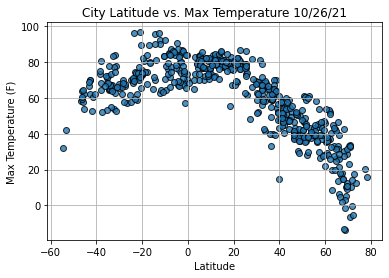

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

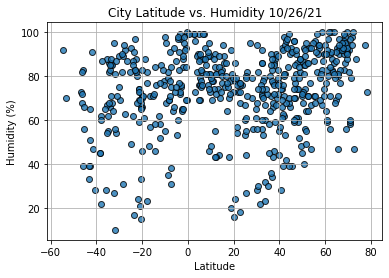

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

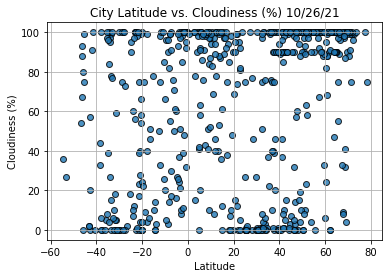

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

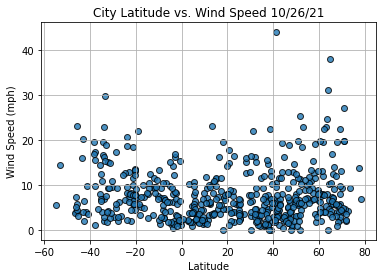

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                     Yar-Sale
Country                        RU
Date          2021-10-27 02:01:41
Lat                       66.8333
Lng                       70.8333
Max Temp                    16.88
Humidity                       93
Cloudiness                     99
Wind Speed                   9.01
Name: 13, dtype: object

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Upernavik,GL,2021-10-27 02:01:36,72.7868,-56.1549,17.58,47,99,4.21
2,Tuktoyaktuk,CA,2021-10-27 02:01:37,69.4541,-133.0374,28.40,100,90,2.30
3,Jamestown,US,2021-10-27 01:59:52,42.0970,-79.2353,45.01,98,100,5.99
5,Nouakchott,MR,2021-10-27 02:01:38,18.0858,-15.9785,78.73,43,85,19.44
7,Bijie,CN,2021-10-27 02:01:39,27.3125,105.2942,48.34,95,100,3.56


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

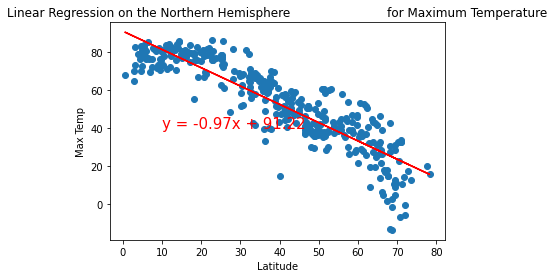

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

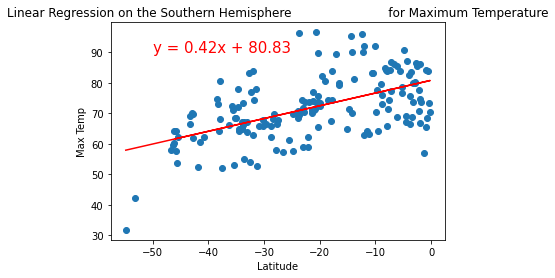

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

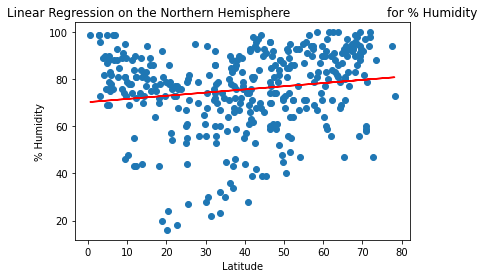

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

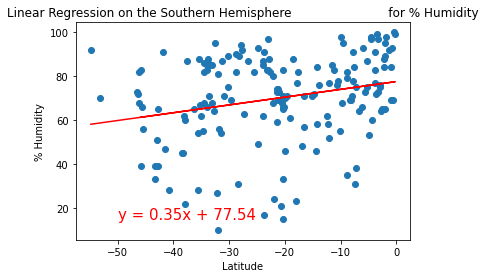

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

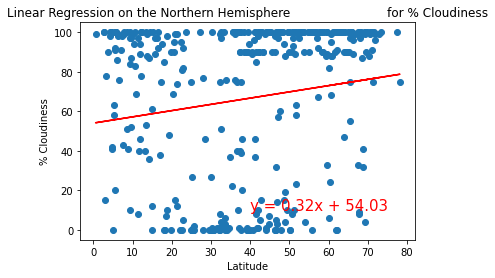

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

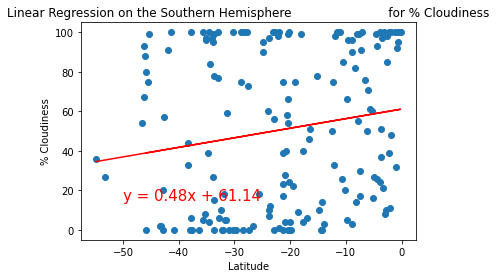

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

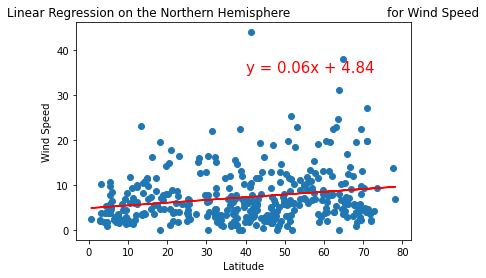

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

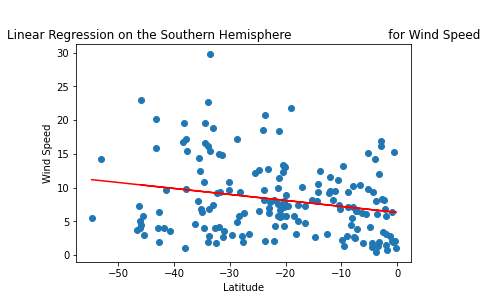

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))